In [1]:
%cd /home/stef/bottle/notebooks
from src.utils import load_json, save_json
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices=False
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D
import io
from PIL import Image
from collections import defaultdict

/home/stef/bottle/notebooks


In [3]:
krs = load_json("../data/mapping/known_rxns_swissprot_enzymes_240310_v2.json")

In [35]:
known_compounds = set()
for k,v in tqdm( krs.items()):
    cpds = ".".join(v['smarts'].split('>>'))
    cpds = set(cpds.split('.'))
    for c in cpds:
        known_compounds.add(c)

100%|██████████| 20382/20382 [00:00<00:00, 431462.75it/s]


In [36]:
known_compounds.remove('')

In [37]:
known_compounds

{'CCCCCCCCCCCCCCCCCCCCCC(=O)NCCS(=O)(=O)O',
 'CC(C)CCCC(C)C1CCC2C3C(O)CC4CC(=O)CCC4(C)C3CC(O)C12C',
 'CC1=CCC2C3C1C2(C)CCCC3(C)C',
 'O=C(OC1OC(CO)C(O)C(O)C1O)c1cc(O)c(O)c(O)c1',
 '*C1OC(COP(*)(=O)O)C(O)C1O',
 'O=CC(O)C(O)CO',
 'O=C(O)CCCCCCCCCCCCCCCCCCCCCCCCCO',
 'O=C(O)c1ccccc1O',
 '*CCC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O',
 'CC(C)=CCC(C=CC(C)=CC=CC(C)=CC=CC(C)=CC=CC=C(C)C=CC=C(C)C=CC=C(C)C=CC(CC=C(C)C)C(C)(C)O)C(C)(C)O',
 '[C-]#[O+]',
 'NC(=O)C=CC(=O)O',
 'C=CC(O)CC(=NOS(=O)(=O)O)SC1OC(CO)C(O)C(O)C1O',
 'COc1ccc2c(c1OC)C[N+]1(C)CCc3cc4c(c(O)c3C1C2)OCO4',
 '*NC(COP(=O)(O)OCC(C)(C)C(O)C(=O)NCCC(=O)NCCSC(=O)C(C)N)C(*)=O',
 'C=C1CCC(O)CC1=CC=C1CCCC2(C)C1CCC2C(C)(O)CC(O)CC(C)(C)O',
 'CC(C)=CCC(C=CC(C)=CC=CC(C)=CC=CC(C)=CC=CC=C(C)C=CC=C(C)C=CC=C(C)CCC(CC=C(C)C)C(C)(C)O)C(C)(C)O',
 'CCCCCCCCCCCCCC(O)C(N)CO',
 'NC(=O)CCC(N)C(=O)O',
 'CCCCCCCCC=CCCCCCCCCOCC(O)COP(=O)(O)O',
 'O=CC=Cc1ccccc1',
 'CCNc1nc(O)nc(NC(C)C)n1',
 'O=C(O)c1cc(C(=O)O

In [38]:
# Specify the file path where you want to save the set
file_path = '../data/mapping/known_compounds_240310_v2.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Iterate over the set
    for element in known_compounds:
        # Write each element to the file followed by a newline
        file.write(element + '\n')

print(f"Set elements have been saved to '{file_path}' successfully.")


Set elements have been saved to '../data/mapping/known_compounds_240310_v2.txt' successfully.


In [10]:
known_mols = [Chem.MolFromSmiles(smi) for smi in known_compounds]

RDKit ERROR: [09:39:23] Can't kekulize mol.  Unkekulized atoms: 2 4 5 11
[09:39:23] Can't kekulize mol.  Unkekulized atoms: 2 4 5 11

RDKit ERROR: 
RDKit ERROR: [09:39:23] Can't kekulize mol.  Unkekulized atoms: 1 5 6 7 8 9
RDKit ERROR: 
[09:39:23] Can't kekulize mol.  Unkekulized atoms: 1 5 6 7 8 9

RDKit ERROR: [09:39:23] Can't kekulize mol.  Unkekulized atoms: 1 5 9 10
RDKit ERROR: 
[09:39:23] Can't kekulize mol.  Unkekulized atoms: 1 5 9 10

RDKit WARNING: [09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit ERROR: [09:39:23] Can't kekulize mol.  Unkekulized atoms: 28 

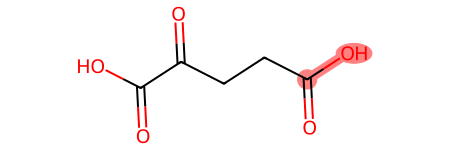

In [3]:
akg = 'O=C(O)CCC(=O)C(=O)O'
m = Chem.MolFromSmiles(akg)

# Reaction center only
m.__sssAtoms = [1, 2]
m.__sssBonds = [0]
m

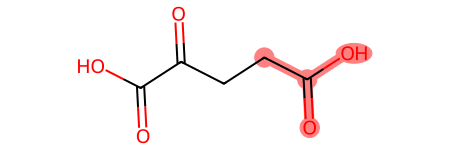

In [4]:
# R=1
m.__sssAtoms = [0, 1, 2, 3]
m.__sssBonds = [0, 1, 2]
m

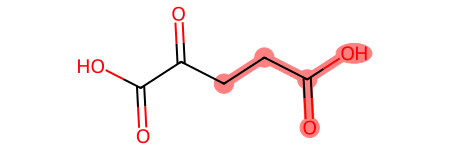

In [5]:
# R=2
m.__sssAtoms = [0, 1, 2, 3, 4]
m.__sssBonds = [0, 1, 2, 3]
m

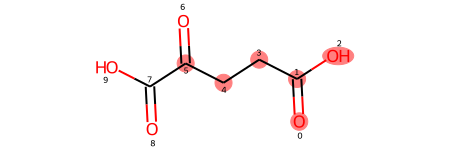

In [22]:
# R=3
m.__sssAtoms = [0, 1, 2, 3, 4, 5]
m

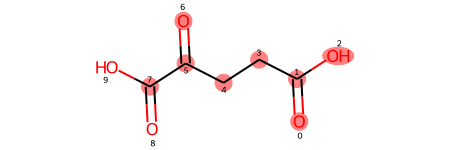

In [23]:
# R=4
m.__sssAtoms = [0, 1, 2, 3, 4, 5, 6, 7]
m

In [6]:
rc_patt = Chem.MolFromSmiles('CO')
r1_patt = Chem.MolFromSmiles('O=C(O)C')
r2_patt = Chem.MolFromSmiles('O=C(O)CC')
rinf_patt = Chem.MolFromSmiles('O=C(O)CCC(=O)C(=O)O')
# Count number of molecules matching substructs

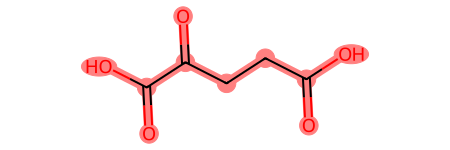

In [7]:
m.GetSubstructMatch(rinf_patt)
m

In [61]:
match_cts = []
for ss in (rc_patt, r1_patt, r2_patt, rinf_patt):
    ss_match = set() 
    for mol in known_mols:
        if mol:
            if mol.GetSubstructMatches(ss):
                ss_match.add(Chem.CanonSmiles(Chem.MolToSmiles(mol)))
        
    match_cts.append(len(ss_match))

In [62]:
match_cts

[7759, 3807, 3250, 8]

In [63]:
ss_match

{'CC(O)(CC(=O)C(=O)O)C(=O)O',
 'NC1C=CC(CC(=O)C(=O)O)(C(=O)O)C=C1',
 'O=C(O)C(=O)CC(O)C(=O)O',
 'O=C(O)C(=O)CC1(C(=O)O)C=CC(O)C=C1',
 'O=C(O)C=C(CC(=O)C(=O)O)C(=O)O',
 'O=C(O)CC(C(=O)O)C(=O)C(=O)O',
 'O=C(O)CC(O)(CC(=O)C(=O)O)C(=O)O',
 'O=C(O)CCC(=O)C(=O)O'}

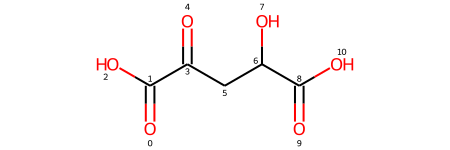

In [66]:
Chem.MolFromSmiles('O=C(O)C(=O)CC(O)C(=O)O')

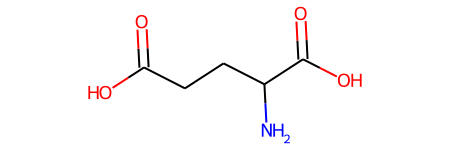

In [69]:
glutamate = 'C(CC(=O)O)C(C(=O)O)N'
IPythonConsole.drawOptions.addAtomIndices=False
Chem.MolFromSmiles(glutamate)

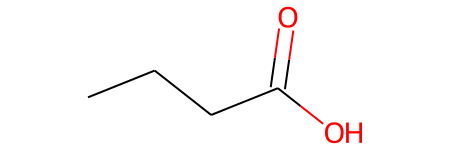

In [75]:
butyric_acid = "CCCC(O)=O"
oxobutyric_acid = "CCC(=O)C(O)=O"
benzoic_acid = "C1=CC=C(C=C1)C(=O)O"

Chem.MolFromSmiles(butyric_acid)

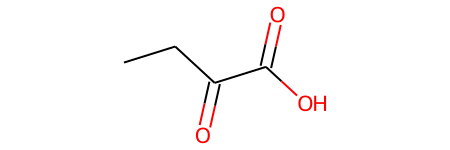

In [73]:
Chem.MolFromSmiles(oxobutyric_acid)

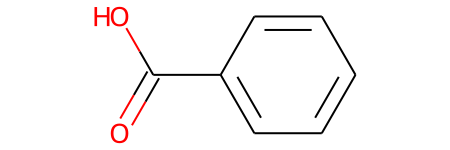

In [76]:
Chem.MolFromSmiles(benzoic_acid)

In [1]:
'''
Get representative examples from akg -> hopa 2 step to illustrate rcmcs
'''
import pickle
import pandas as pd
from src.rxn_ctr_mcs import *

# Params
starters = 'alpha_ketoglutarate'
targets = 'hopa'
generations = 2
ts = 0

expansion_dir = '../data/processed_expansions/'
fn = f"{starters}_to_{targets}_gen_{generations}_tan_sample_{ts}_n_samples_1000.pkl" # Expansion file name

# Load rules
min_rules = pd.read_csv("../data/rules/minimal1224_all_uniprot.tsv", sep='\t')
min_rules.set_index("Name", inplace=True)

# Load processed expansions
with open(expansion_dir + fn, 'rb') as f:
    pe = pickle.load(f)

In [2]:
enzyme_validation_threshold = 1.0
sort_by = ['prc_mcs']
filter_by = {'mdf':0, 'enzyme_validation':enzyme_validation_threshold}
path_ids = [15, 5, 1]

paths = pe.get_paths_w_id(path_ids,
                sort_by=sort_by,
                filter_by=filter_by,
                reduce_predicted_reactions='min'
                )

In [3]:
rxn_idxs = [1, 0, 0]
paths = pe.get_paths_w_id(path_ids)
prids = []
for path, rxn_idx in zip(paths, rxn_idxs):
    prid = path.reaction_ids[rxn_idx]
    # kr_id = pe.predicted_reactions[pr_id].top_analogue()['analogue'].id
    prids.append(prid)

In [41]:
def get_rc_mcs_atoms(
        rxns,
        rc_atoms,
        min_rule,
        norm='max atoms'
        ):
    '''
    Args
    ----
    rxns:List[str] - SMARTS of two reactant-aligned reactions 
    rc_atoms:List[Tuple[tuple]] - Idxs of reactant center atoms for each substrate
    min_rule:str - Min operator template shared btwn reactions
    norm:str - Normalization to get an index out of
        prcmcs. 'min atoms' normalizes by smaller
        of the two substrates, 'max atoms' by the larger
    Returns
    -------
    rc_mcs:List[float] - rc_mcs values per aligned substrate pair
    '''
    rxns = [AllChem.ReactionFromSmarts(sma, useSmiles=True) for sma in rxns]
    patts = get_lhs_patts_from_operator(min_rule)
    rc_fragments = [Chem.MolFromSmarts(patt) for patt in patts]

    # Set isotopes to customise FindMCS w/ atom map #
    for i, rxn in enumerate(rxns):
        for j, sub in enumerate(rxn.GetReactants()):
            for atom in sub.GetAtoms():
                atom_idx = atom.GetIdx()
                if atom_idx in rc_atoms[i][j]:
                    atom.SetIsotope(atom.GetAtomMapNum() * atom.GetAtomicNum() * 99) # Rxn ctr atom
                else:
                    atom.SetIsotope(atom.GetAtomicNum()) # Non rxn ctr atom

    # Set isotopes for 1st rxn's rxn ctrs same as rc within substrates
    for elt in rc_fragments:
        for atom in elt.GetAtoms():
            atom.SetIsotope(atom.GetAtomMapNum() * atom.GetAtomicNum() * 99)

    # Get prc mcs
    output = []
    for i in range(rxns[0].GetNumReactantTemplates()):
        subs = [rxns[0].GetReactantTemplate(i), rxns[1].GetReactantTemplate(i)]

        for elt in subs:
            Chem.SanitizeMol(elt)
        
        frag = rc_fragments[i] # Rxn ctr from rxn1 has right atom map # for FindMCS seed

        res = rdFMCS.FindMCS(subs, seedSmarts=Chem.MolToSmarts(frag),
                                atomCompare=rdFMCS.AtomCompare.CompareIsotopes,
                                bondCompare=rdFMCS.BondCompare.CompareOrderExact,
                                matchChiralTag=False,
                                ringMatchesRingOnly=True,
                                completeRingsOnly=True,
                                matchValences=True,
                                timeout=10
                            )
        
        val = res.numAtoms / max(subs[0].GetNumAtoms(), subs[1].GetNumAtoms())
        
        output.append([Chem.MolToSmiles(subs[0]), Chem.MolToSmiles(subs[1]), res.smartsString, val])
    return output

In [42]:
output = []
for prid in prids:
    pr = pe.predicted_reactions[prid]
    pr_smarts = pr.smarts
    imt_rule = pr.imt_rules[0]
    min_rule_name = imt_rule.split('_')[0]
    min_rule = min_rules.loc[min_rule_name, 'SMARTS']
    pr_rc, pr_smarts_perm = get_pred_rxn_ctr(pr_smarts, min_rule)
    kr = pe.predicted_reactions[prid].top_analogue()['analogue']
    kr_smarts, kr_rc = kr.smarts, kr.rcs[0]
    perm_idx = align_reactants(
                    known_reaction_smarts=kr_smarts,
                    known_reaction_rc=kr_rc,
                    min_rule=min_rule
                    )
    # Permute to align KR smarts and rc w/ op template
    kr_rcts = kr_smarts.split('>>')[0].split('.')
    kr_rcts_perm = permute_by_idxs(kr_rcts, perm_idx)
    kr_smarts_perm = ".".join(kr_rcts_perm) + '>>' + kr_smarts.split('>>')[1]
    kr_rc_perm = permute_by_idxs(kr_rc, perm_idx)

    # Compute rc-mcs values
    rxns = [pr_smarts_perm, kr_smarts_perm]
    rc_atoms = [pr_rc, kr_rc_perm]
    res = get_rc_mcs_atoms(
                    rxns,
                    rc_atoms,
                    min_rule,
                    )
    
    output.append(res)


In [21]:
sidxs = [1, 2, 1]




['OC(=[8O])[6CH2][6CH2][6C](=[8O])[6C](=[8O])[8OH]',
 '[6CH3][6CH2][6CH2][6CH2][6CH2][6CH2][6CH2][6CH2][6CH2][6CH2][6CH2][6CH2][6CH2][6CH2][6CH2]C(O)=[8O]',
 '[0*&!R](-&!@[0*&!R])(=&!@[8*&!R])-&!@[6*&!R]-&!@[6*&!R]-&!@[6*&!R]-&!@[6*&!R]']

0.6363636363636364


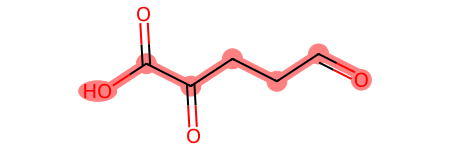

In [43]:
row = output[0][1]
mol1 = Chem.MolFromSmiles(row[0])
mol2 = Chem.MolFromSmiles(row[1])

for mol in [mol1, mol2]:
    mol.GetSubstructMatch(Chem.MolFromSmarts(row[2]))

for mol in [mol1, mol2]:
    for a in mol.GetAtoms():
        a.SetIsotope(0)

print(row[-1])

mol1

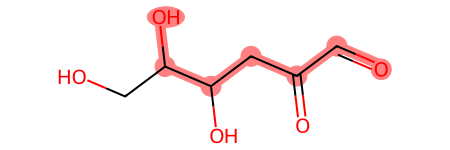

In [38]:
mol2

0.45454545454545453


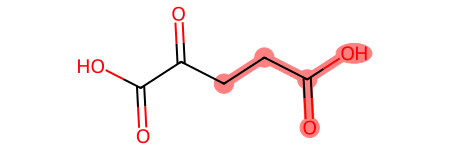

In [45]:
row = output[1][2]
mol1 = Chem.MolFromSmiles(row[0])
mol2 = Chem.MolFromSmiles(row[1])

for mol in [mol1, mol2]:
    mol.GetSubstructMatch(Chem.MolFromSmarts(row[2]))

for mol in [mol1, mol2]:
    for a in mol.GetAtoms():
        a.SetIsotope(0)

print(row[-1])

mol1

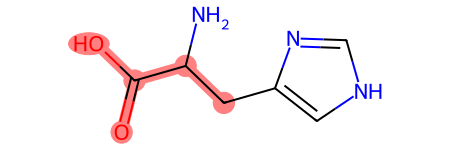

In [46]:
mol2

0.3888888888888889


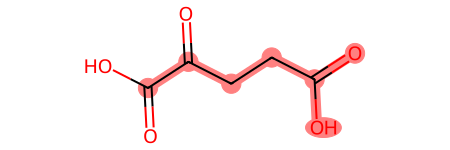

In [47]:
row = output[2][1]
mol1 = Chem.MolFromSmiles(row[0])
mol2 = Chem.MolFromSmiles(row[1])

for mol in [mol1, mol2]:
    mol.GetSubstructMatch(Chem.MolFromSmarts(row[2]))

for mol in [mol1, mol2]:
    for a in mol.GetAtoms():
        a.SetIsotope(0)

print(row[-1])

mol1

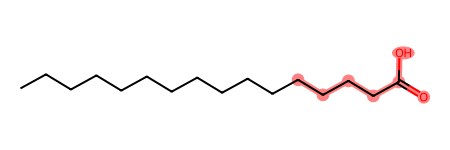

In [48]:
mol2

In [52]:
7/18

0.3888888888888889

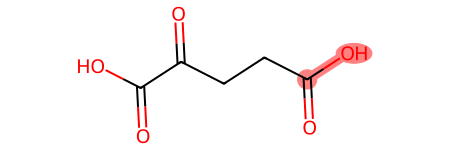

In [31]:
akg_smi = 'O=C(O)CCC(=O)C(=O)O'
semi_smi = 'O=CCCC(=O)C(=O)O'
alc = '[#6:0]-[#8:1]'
akg = Chem.MolFromSmiles(akg_smi)
semi = Chem.MolFromSmiles(semi_smi)
akg.GetSubstructMatch(Chem.MolFromSmarts(alc))
akg

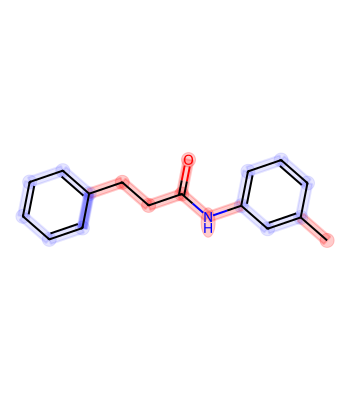

In [21]:
mol = Chem.MolFromSmiles('CC1=CC(=CC=C1)NC(=O)CCC2=CC=CC=C2')
colors = [(0.0, 0.0, 1.0, 0.1), (1.0, 0.0, 0.0, 0.2)]

athighlights = defaultdict(list)
arads = {}
for a in mol.GetAtoms():
    if a.GetIsAromatic():
        aid = a.GetIdx()
        athighlights[aid].append(colors[0])
        arads[aid] = 0.3
    else:
        aid = a.GetIdx()
        athighlights[aid].append(colors[1])
        arads[aid] = 0.3

# bndhighlights = defaultdict(list)
# for bond in mol.GetBonds():
#     aid1 = bond.GetBeginAtomIdx()
#     aid2 = bond.GetEndAtomIdx()

    if bond.GetIsAromatic():
        bid = mol.GetBondBetweenAtoms(aid1,aid2).GetIdx()
        bndhighlights[bid].append(colors[0])
    else:
        bid = mol.GetBondBetweenAtoms(aid1,aid2).GetIdx()
        bndhighlights[bid].append(colors[1])

d2d = rdMolDraw2D.MolDraw2DCairo(350,400)
d2d.DrawMoleculeWithHighlights(
    mol,
    "",
    dict(athighlights),
    dict(bndhighlights),
    arads,
    {}
    )
d2d.FinishDrawing()
bio = io.BytesIO(d2d.GetDrawingText())
Image.open(bio)

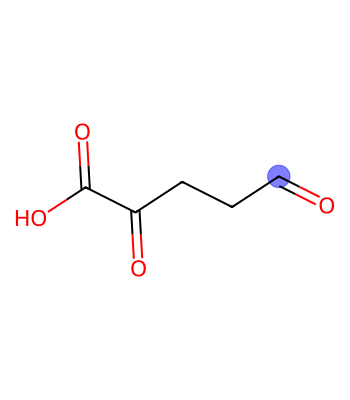

In [27]:
ah = {1:[(0.0, 0.0, 1.0, 0.5)]}
d2d = rdMolDraw2D.MolDraw2DCairo(350,400)
d2d.DrawMoleculeWithHighlights(
    semi,
    "",
    ah,
    {},
    {i:0.3 for i in range(semi.GetNumAtoms())},
    {}
    )
d2d.FinishDrawing()
bio = io.BytesIO(d2d.GetDrawingText())
Image.open(bio)

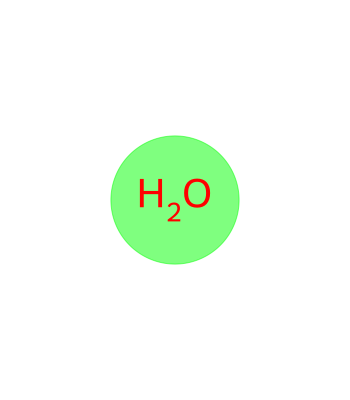

In [29]:
water = Chem.MolFromSmiles('O')
mol = water
ah = {0:[(0.0, 1.0, 0.0, 0.5)]}
d2d = rdMolDraw2D.MolDraw2DCairo(350,400)
d2d.DrawMoleculeWithHighlights(
    mol,
    "",
    ah,
    {},
    {i:0.3 for i in range(mol.GetNumAtoms())},
    {}
    )
d2d.FinishDrawing()
bio = io.BytesIO(d2d.GetDrawingText())
Image.open(bio)

In [17]:
dict(athighlights)

{0: [(1.0, 0.0, 0.0, 0.2)],
 1: [(0.0, 0.0, 1.0, 0.1)],
 2: [(0.0, 0.0, 1.0, 0.1)],
 3: [(0.0, 0.0, 1.0, 0.1)],
 4: [(0.0, 0.0, 1.0, 0.1)],
 5: [(0.0, 0.0, 1.0, 0.1)],
 6: [(0.0, 0.0, 1.0, 0.1)],
 7: [(1.0, 0.0, 0.0, 0.2)],
 8: [(1.0, 0.0, 0.0, 0.2)],
 9: [(1.0, 0.0, 0.0, 0.2)],
 10: [(1.0, 0.0, 0.0, 0.2)],
 11: [(1.0, 0.0, 0.0, 0.2)],
 12: [(0.0, 0.0, 1.0, 0.1)],
 13: [(0.0, 0.0, 1.0, 0.1)],
 14: [(0.0, 0.0, 1.0, 0.1)],
 15: [(0.0, 0.0, 1.0, 0.1)],
 16: [(0.0, 0.0, 1.0, 0.1)],
 17: [(0.0, 0.0, 1.0, 0.1)]}

In [28]:
'''
Next target mols for bottle
'''

mvacid = 'C=C(CCCO)C(=O)O'
dmmha = 'OC(C)C(C)(C)C(=O)O'
hopa = 'O=C(O)C(=O)CCCO'
dpha = 'C(C(C(=O)O)(CCC)CCC)(C)O'
mvl = 'C=C1CCCOC1=O'

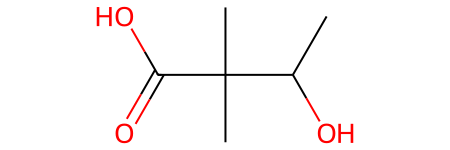

In [22]:
Chem.MolFromSmiles(dmmha)

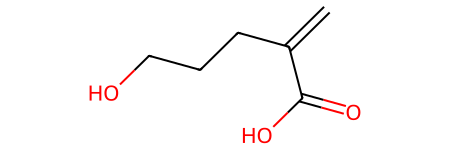

In [23]:
Chem.MolFromSmiles(mvacid)

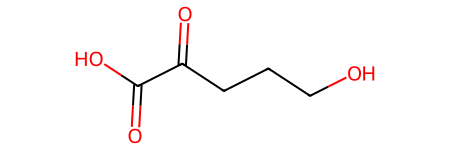

In [24]:
Chem.MolFromSmiles(hopa)

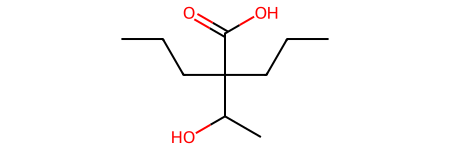

In [27]:
Chem.MolFromSmiles(dpha)

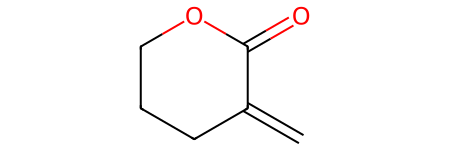

In [29]:
Chem.MolFromSmiles(mvl)

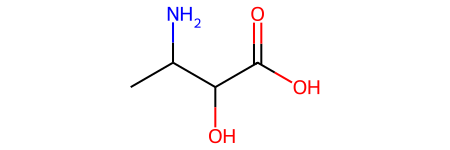

In [28]:
pos = 'CC(N)C(O)C(O)=O'
neg1 = 'C(=O)(O)CC(O)C(O)=O'
neg2 = 'OCCCCO'
neg3 = 'CCCCCCCCC(N)C(O)C(O)=O'
neg4 = 'CCCC'


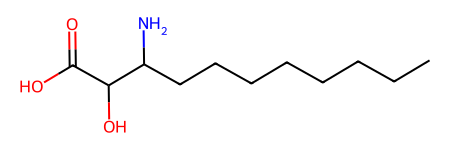

In [29]:
import src
krs = src.utils.load_json(know)